In [18]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf

3.c

In [19]:
A = np.array([
    [-0.6,  1.4,  0.0],
    [ 0.4, -0.6,  1.0],
    [ 1.0, -0.6,  0.4]
])

b = np.array([0.0, 0.0, 0.02])

solution = np.linalg.solve(A, b)
print(solution)   # gamma0, gamma1, gamma2
print(7/240, 1/80, -1/240) # confirming my by-hand solution

[ 0.02916667  0.0125     -0.00416667]
0.029166666666666667 0.0125 -0.004166666666666667


3.d

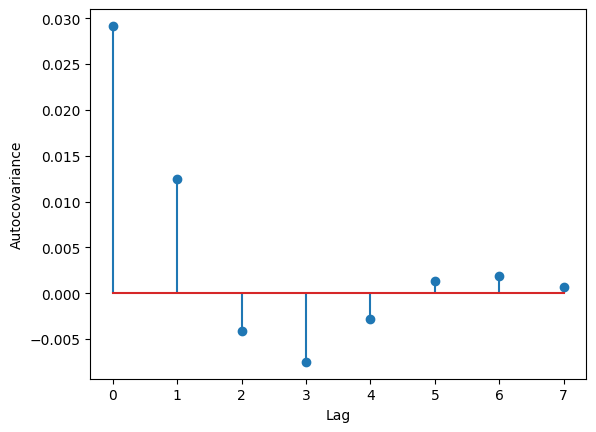

In [20]:
gamma0 = 7/240
gamma1 = 1/80
gamma2 = -1/240

gammas = [gamma0, gamma1, gamma2]

for k in range(3, 8):
    gammas.append(0.6*gammas[k-1] - 0.4*gammas[k-2])

plt.stem(range(8), gammas)
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.show()


3.e

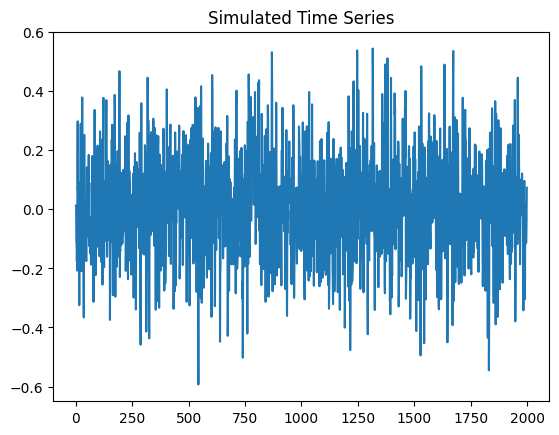

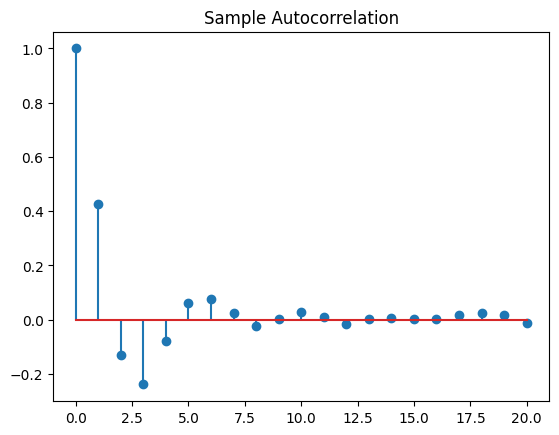

Sample autocorrelations: [ 0.4271079  -0.12869683 -0.23894961]
Sample autocovariances: 0.011971755734830251 -0.0036091539890329262 -0.006704421492504395


In [21]:
T = 2000
mu = 0.0125
phi1 = 0.6
phi2 = -0.4
sigma2 = 0.02

a = np.random.normal(0, np.sqrt(sigma2), T)
r = np.zeros(T)

r[0] = mu
r[1] = mu

for t in range(2, T):
    r[t] = 0.01 + phi1*r[t-1] + phi2*r[t-2] + a[t]

plt.plot(r)
plt.title("Simulated Time Series")
plt.show()

acf_vals = acf(r, nlags=20, fft=False)

plt.stem(range(len(acf_vals)), acf_vals)
plt.title("Sample Autocorrelation")
plt.show()

# sample autocovariances
r_centered = r - np.mean(r)
gamma0_hat = np.mean(r_centered**2)
gamma1_hat = np.mean(r_centered[1:] * r_centered[:-1])
gamma2_hat = np.mean(r_centered[2:] * r_centered[:-2])
gamma3_hat = np.mean(r_centered[3:] * r_centered[:-3])

print("Sample autocorrelations:", acf_vals[1:4])
print("Sample autocovariances:", gamma1_hat, gamma2_hat, gamma3_hat)

Question 4

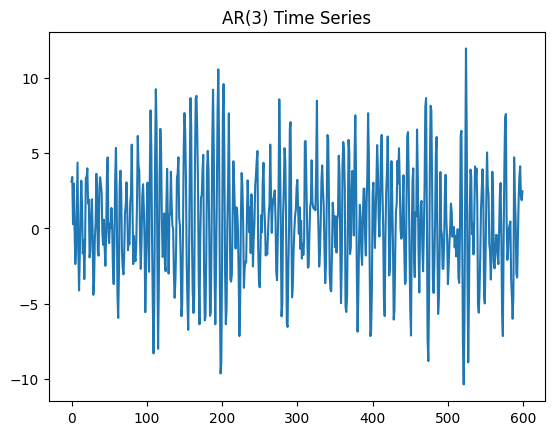

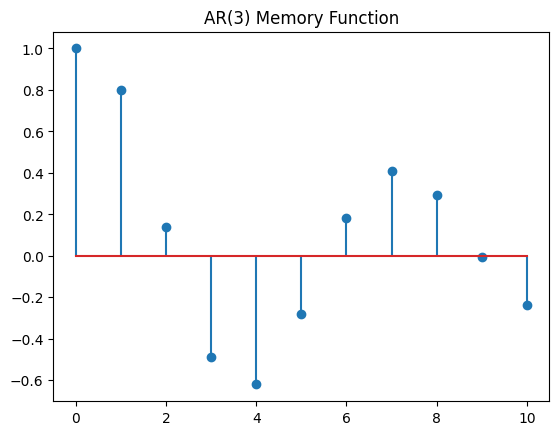

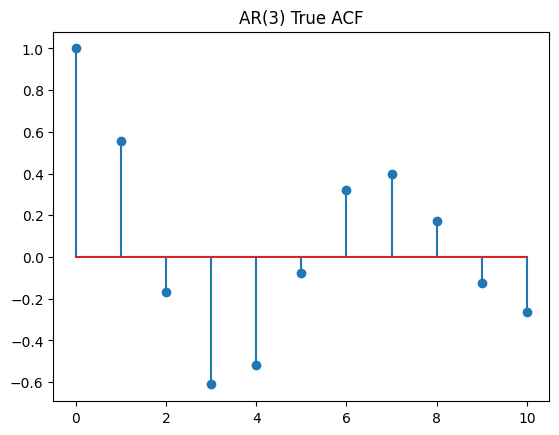

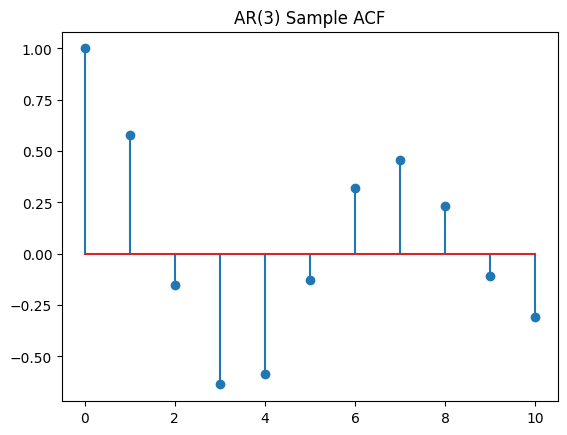

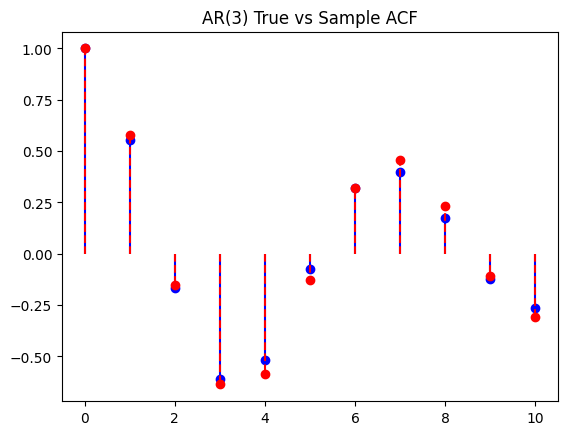

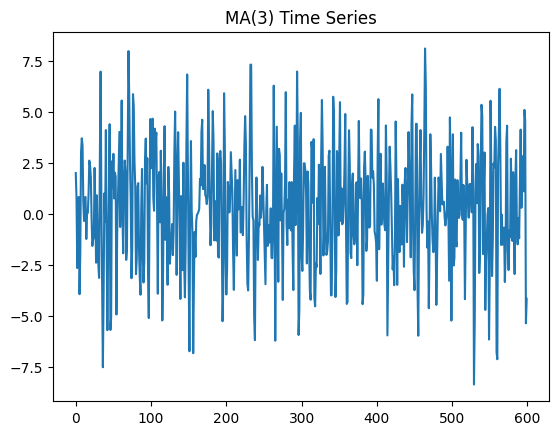

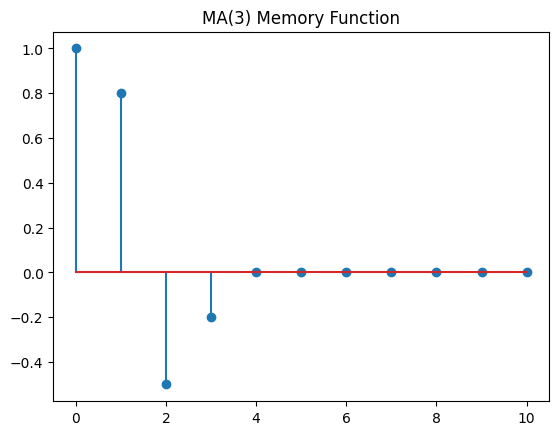

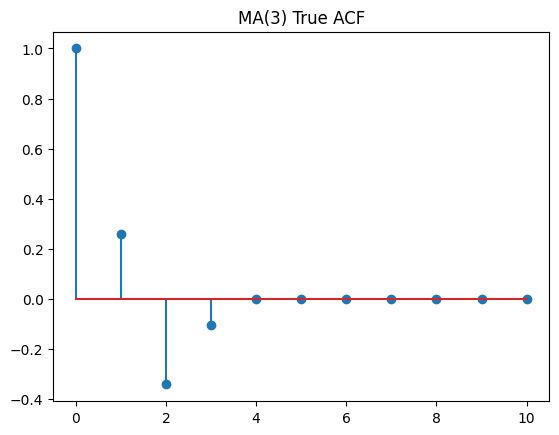

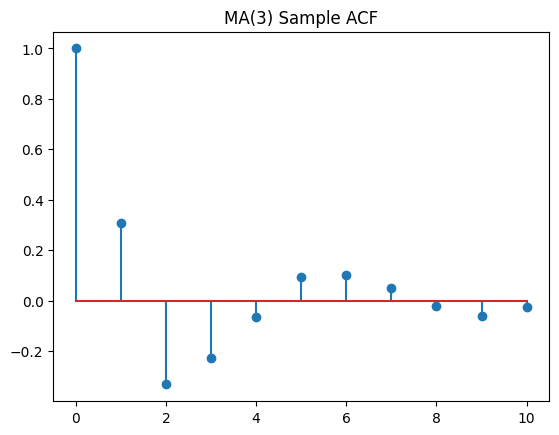

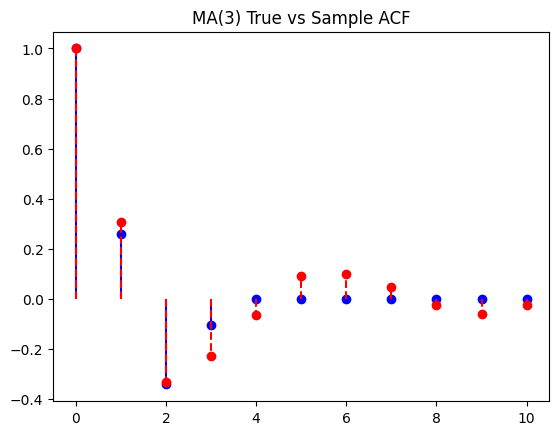

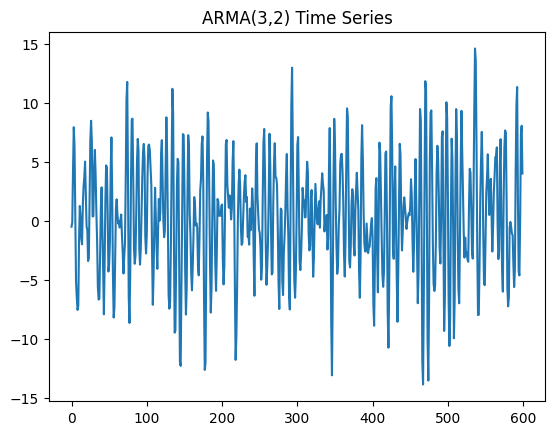

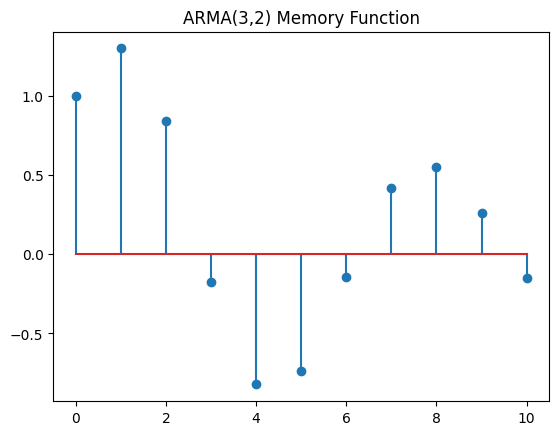

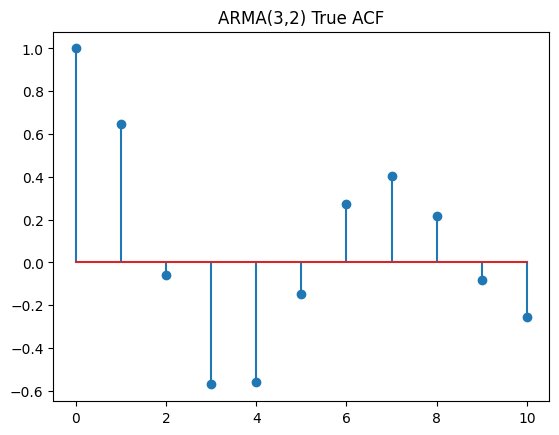

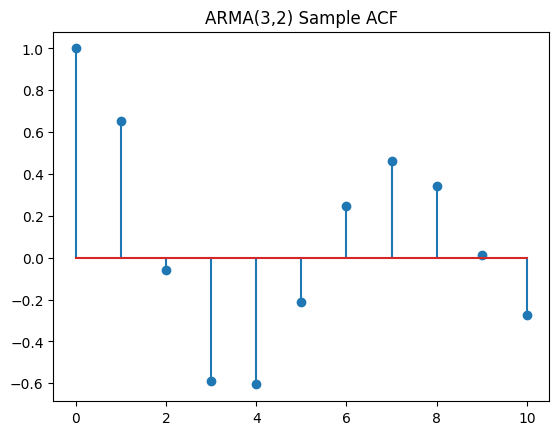

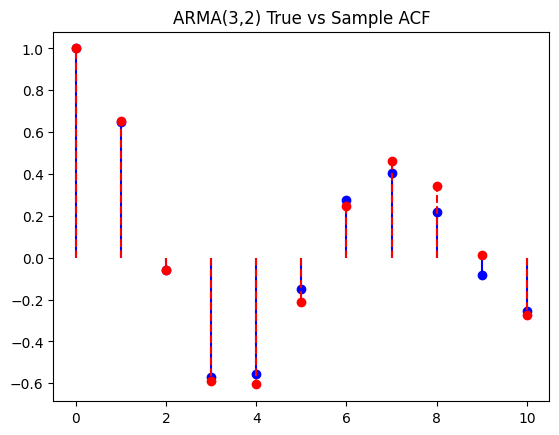

In [22]:
T = 600
sigma = 2   # sqrt(4)

models = {
    "AR(3)": {
        "ar": [1, -0.8, 0.5, 0.2],   # changed signs due to AR Python definition
        "ma": [1]
    },
    "MA(3)": {
        "ar": [1],
        "ma": [1, 0.8, -0.5, -0.2]
    },
    "ARMA(3,2)": {
        "ar": [1, -0.8, 0.5, 0.2],
        "ma": [1, 0.5, 0.3]
    }
}

for name, params in models.items():

    ar = np.array(params["ar"])
    ma = np.array(params["ma"])

    arma = ArmaProcess(ar, ma)

    series = arma.generate_sample(nsample=T, scale=sigma) + 0.3

    plt.figure()
    plt.plot(series)
    plt.title(f"{name} Time Series")
    plt.show()

    # Memory function - "impulse response" in Python
    psi = arma.impulse_response(11)

    plt.figure()
    plt.stem(range(11), psi)
    plt.title(f"{name} Memory Function")
    plt.show()

    # True autocorrelation
    rho_true = arma.acf(11)

    plt.figure()
    plt.stem(range(11), rho_true)
    plt.title(f"{name} True ACF")
    plt.show()

    # Sample autocorrelation
    rho_sample = acf(series, nlags=10, fft=False)

    plt.figure()
    plt.stem(range(11), rho_sample)
    plt.title(f"{name} Sample ACF")
    plt.show()

    # Compare
    plt.figure()
    plt.stem(range(11), rho_true, linefmt='b-', markerfmt='bo', basefmt=" ")
    plt.stem(range(11), rho_sample, linefmt='r--', markerfmt='ro', basefmt=" ")
    plt.title(f"{name} True vs Sample ACF")
    plt.show()
